## Import Libraries

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

## Load Dataset

In [2]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
from collections import Counter
counts = Counter(iris.target)
counts

Counter({0: 50, 1: 50, 2: 50})

## Display feature names

In [4]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## Splitting the dataset

In [5]:
x = iris.data[:, 2:] # considering only the petal length and petal width as the features
y = iris.target

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)

In [7]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((105, 2), (105,), (45, 2), (45,))

## Train the Model

In [8]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier() # model creation
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

## Make Prediction

In [9]:
predictions = classifier.predict(x_test)
predictions

array([2, 2, 0, 2, 0, 1, 0, 1, 2, 0, 2, 0, 1, 2, 1, 2, 1, 0, 2, 2, 1, 0,
       1, 1, 2, 0, 0, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 0, 2, 1, 0, 2, 1, 2,
       0])

In [10]:
y_test == predictions

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

## Classification Report

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## Performance Measure

In [12]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.9777777777777777


<AxesSubplot:>

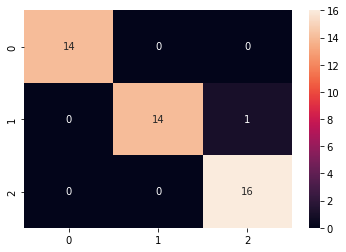

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True)

## Visualising decision tree

In [14]:
from sklearn.tree import export_graphviz
export_graphviz(
classifier,
out_file="iris_tree.dot", 
feature_names=iris.feature_names[2:],
class_names=iris.target_names,
rounded=True,
filled=True
)

In [15]:
%ls

 Volume in drive E is New Volume
 Volume Serial Number is B4BD-74D8

 Directory of E:\Engineering college\5th sem\ML\lab\iris_dataset

08-12-2021  12:47    <DIR>          .
08-12-2021  11:24    <DIR>          ..
08-12-2021  11:26    <DIR>          .ipynb_checkpoints
08-12-2021  12:47           311,512 iris_dataset_code.ipynb
08-12-2021  12:49             2,076 iris_tree.dot
08-12-2021  12:47            41,863 iris_tree.png
               3 File(s)        355,451 bytes
               3 Dir(s)  355,446,112,256 bytes free


In [16]:
! dot -Tpng iris_tree.dot -o iris_tree.png
# import graphviz
# with open("iris_tree.dot") as f:
#     dot_graph = f.read()
# graphviz.Source(dot_graph)

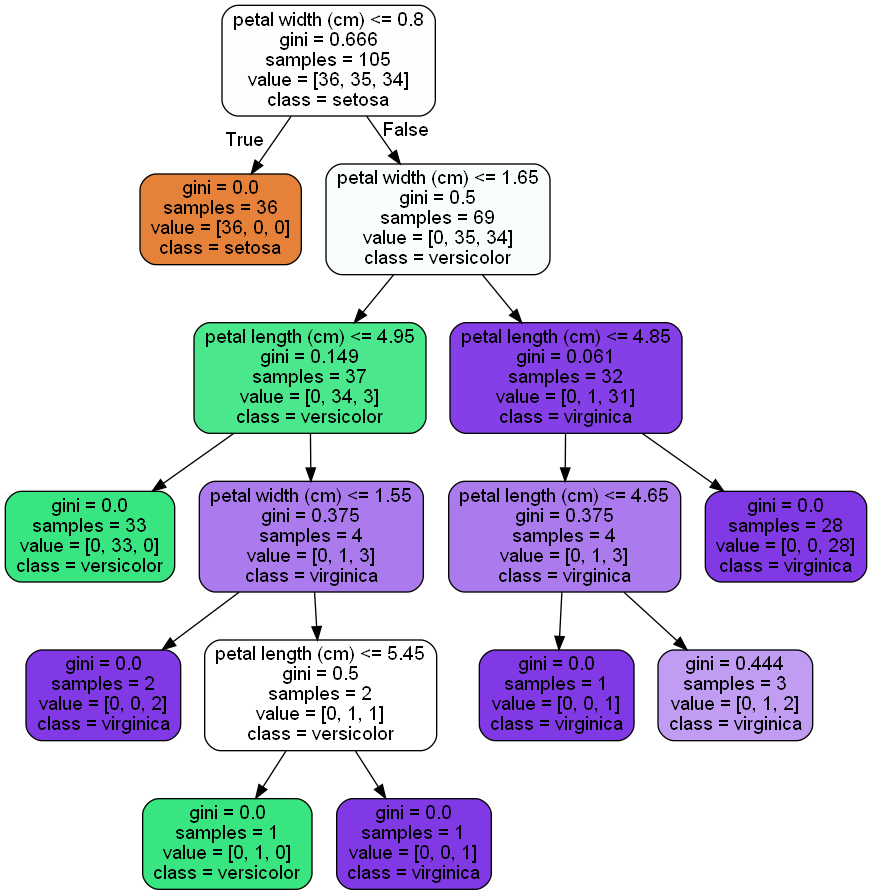

In [17]:
from IPython.display import Image
Image(filename='iris_tree.png')

[Text(133.92000000000002, 199.32, 'X[1] <= 0.8\ngini = 0.666\nsamples = 105\nvalue = [36, 35, 34]'),
 Text(100.44000000000001, 163.07999999999998, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(167.40000000000003, 163.07999999999998, 'X[1] <= 1.65\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(66.96000000000001, 126.83999999999999, 'X[0] <= 4.95\ngini = 0.149\nsamples = 37\nvalue = [0, 34, 3]'),
 Text(33.480000000000004, 90.6, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(100.44000000000001, 90.6, 'X[1] <= 1.55\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(66.96000000000001, 54.359999999999985, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(133.92000000000002, 54.359999999999985, 'X[0] <= 5.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(100.44000000000001, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(167.40000000000003, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(267.8400000000000

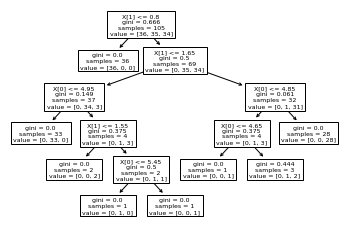

In [18]:
from sklearn.tree import plot_tree
plot_tree(classifier)

# Model 2

## Import Libraries

In [19]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

## Load Dataset

In [20]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [21]:
from collections import Counter
counts = Counter(iris.target)
counts

Counter({0: 50, 1: 50, 2: 50})

## Display feature names

In [22]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## Splitting the dataset

In [23]:
x = iris.data[:, 2:] # considering only the petal length and petal width as the features
y = iris.target

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)

In [25]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((105, 2), (105,), (45, 2), (45,))

## Train the Model

In [26]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier(max_depth=2) # model creation
classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

## Make Prediction

In [27]:
predictions = classifier.predict(x_test)
predictions

array([0, 2, 1, 2, 0, 2, 1, 0, 1, 0, 0, 2, 2, 0, 2, 2, 1, 1, 2, 1, 2, 2,
       2, 0, 1, 1, 2, 0, 2, 0, 1, 1, 0, 0, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2,
       0])

In [28]:
y_test == predictions

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True, False,  True])

## Classification Report

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.80      0.89        15
           2       0.85      1.00      0.92        17

    accuracy                           0.93        45
   macro avg       0.95      0.93      0.94        45
weighted avg       0.94      0.93      0.93        45



## Performance Measure

In [30]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.9333333333333333


<AxesSubplot:>

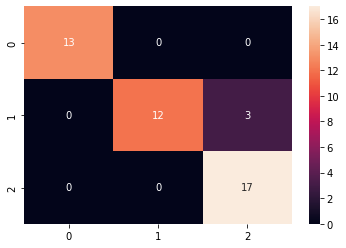

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True)

## Visualising decision tree

In [32]:
from sklearn.tree import export_graphviz
export_graphviz(
classifier,
out_file="iris_tree.dot", 
feature_names=iris.feature_names[2:],
class_names=iris.target_names,
rounded=True,
filled=True
)

In [33]:
%ls

 Volume in drive E is New Volume
 Volume Serial Number is B4BD-74D8

 Directory of E:\Engineering college\5th sem\ML\lab\iris_dataset

08-12-2021  12:47    <DIR>          .
08-12-2021  11:24    <DIR>          ..
08-12-2021  11:26    <DIR>          .ipynb_checkpoints
08-12-2021  12:47           311,512 iris_dataset_code.ipynb
08-12-2021  12:49               838 iris_tree.dot
08-12-2021  12:49           116,626 iris_tree.png
               3 File(s)        428,976 bytes
               3 Dir(s)  355,446,038,528 bytes free


In [34]:
! dot -Tpng iris_tree.dot -o iris_tree.png
# import graphviz
# with open("iris_tree.dot") as f:
#     dot_graph = f.read()
# graphviz.Source(dot_graph)

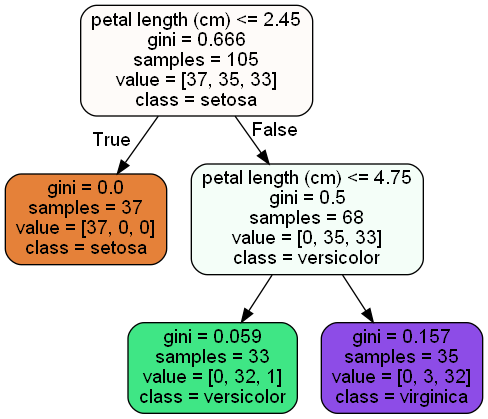

In [35]:
from IPython.display import Image
Image(filename='iris_tree.png')

[Text(133.92000000000002, 181.2, 'X[0] <= 2.45\ngini = 0.666\nsamples = 105\nvalue = [37, 35, 33]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[0] <= 4.75\ngini = 0.5\nsamples = 68\nvalue = [0, 35, 33]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.157\nsamples = 35\nvalue = [0, 3, 32]')]

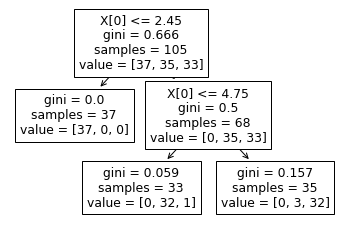

In [36]:
from sklearn.tree import plot_tree
plot_tree(classifier)